In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import random

In [3]:
### import data
train_data = pd.read_csv('../input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv', engine = 'python')
test_data = pd.read_csv('../input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv', engine = 'python')
# train_data.head()

In [4]:
# print("train shape")
# train_data.shape
# print("test shape")
test_data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,11.247351,147.532627,150.445761,153.324317,155.663413,158.169688,160.790853,162.282766,163.649191,165.589515,...,138.546570,145.539598,150.744980,155.638873,158.893196,159.648494,158.162019,157.672755,156.664250,154.776771
std,7.446712,43.593144,41.867838,40.442728,39.354776,37.749637,36.090916,36.212636,35.885378,33.721876,...,64.501665,65.132370,65.760539,65.565147,65.200300,65.499368,66.493576,66.009690,67.202939,68.285148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,122.000000,126.000000,130.000000,134.000000,137.000000,141.000000,144.000000,145.000000,147.000000,...,90.000000,95.000000,99.000000,105.000000,113.000000,113.750000,113.000000,115.000000,111.000000,106.750000
50%,11.000000,154.000000,157.000000,159.000000,161.000000,163.000000,165.000000,166.000000,168.000000,169.000000,...,137.000000,155.000000,168.000000,177.000000,181.000000,182.000000,181.000000,180.000000,180.000000,179.000000
75%,18.000000,178.000000,179.000000,181.000000,182.000000,184.000000,185.000000,186.000000,187.000000,187.000000,...,195.000000,200.000000,204.250000,207.000000,207.000000,208.000000,207.000000,205.000000,206.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [5]:
### Data assignment and normalization
image_size = 28*28
X_train = train_data.drop('label', axis =1).copy()
X_test = test_data.drop('label', axis = 1).copy()

Y_train = train_data['label'].copy()

X_train = X_train / 255.0
X_test = X_test / 255.0

# X_train.head()
# Y_train.head()

In [6]:
X_test.describe

<bound method NDFrame.describe of         pixel1    pixel2    pixel3    pixel4    pixel5    pixel6    pixel7  \
0     0.584314  0.584314  0.588235  0.588235  0.588235  0.592157  0.592157   
1     0.494118  0.501961  0.513725  0.517647  0.521569  0.525490  0.529412   
2     0.333333  0.345098  0.360784  0.376471  0.411765  0.482353  0.529412   
3     0.796078  0.803922  0.811765  0.807843  0.811765  0.819608  0.823529   
4     0.737255  0.749020  0.756863  0.764706  0.780392  0.788235  0.792157   
...        ...       ...       ...       ...       ...       ...       ...   
7167  0.529412  0.466667  0.423529  0.400000  0.411765  0.388235  0.239216   
7168  0.615686  0.623529  0.631373  0.643137  0.650980  0.650980  0.670588   
7169  0.745098  0.749020  0.745098  0.749020  0.745098  0.745098  0.752941   
7170  0.788235  0.803922  0.815686  0.819608  0.839216  0.847059  0.854902   
7171  0.678431  0.682353  0.678431  0.682353  0.678431  0.678431  0.686275   

        pixel8    pixel9   pi

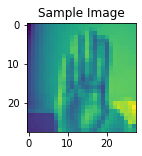

In [7]:
### Showing Images
fig, ax = plt.subplots(figsize = (2, 2))
trash = np.asarray(X_train.iloc[[3544],:]).reshape(28, 28)
trash.shape
plt.imshow(trash)
plt.title("Sample Image")
plt.show()


In [8]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

In [9]:
### data spliting and one-hot encoding
num_class = len(Y_train.unique())+1
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2)
Y_train = keras.utils.to_categorical(Y_train, num_classes = num_class)
Y_val = keras.utils.to_categorical(Y_val, num_classes = num_class)

In [10]:
def CNN():
    model = keras.Sequential()
    model.add(layers.Conv2D(32, (3, 3), (1, 1), padding ='valid', input_shape = (28, 28, 1), activation = 'relu'))
    model.add(layers.Conv2D(32, (3, 3), (1, 1), padding = 'same', activation = 'relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2), (2, 2), padding = 'valid'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Conv2D(64, (3, 3), (1, 1), padding ='valid', activation = 'relu'))
    model.add(layers.Conv2D(64, (3, 3), (1, 1), padding = 'same', activation = 'relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2), (2, 2), padding = 'valid'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation = 'relu'))
    model.add(layers.Dense(num_class, activation = 'softmax'))
    
    return model
    
    
    

In [11]:
model = CNN()
model.compile(optimizer = 'adam', loss = 'CategoricalCrossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        3

In [12]:
history = model.fit(X_train, Y_train, 
                  validation_data = (X_val, Y_val),
                   batch_size = 25, epochs = 3)

Epoch 1/3
879/879 [==============================] - 43s 49ms/step - loss: 0.8664 - accuracy: 0.7334 - val_loss: 0.0678 - val_accuracy: 0.9803
Epoch 2/3
879/879 [==============================] - 42s 47ms/step - loss: 0.0945 - accuracy: 0.9661 - val_loss: 0.0423 - val_accuracy: 0.9843
Epoch 3/3
879/879 [==============================] - 43s 49ms/step - loss: 0.0516 - accuracy: 0.9822 - val_loss: 0.0036 - val_accuracy: 0.9991


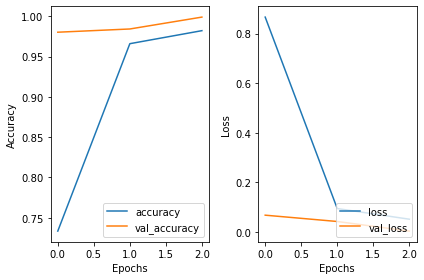

In [13]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = 'lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

In [14]:
# from sklearn.metrics import mean_absolute_error
# val_preds = model.predict(X_val)
# val_mae = mean_absolute_error(val_preds, Y_val)
# val_mae

In [15]:
def predict(model, X, imgs):
    y_test = test_data['label'].copy()
    s = int(np.sqrt(imgs))
    fig, ax = plt.subplots(s, s, sharex=True, sharey=True, figsize=(15, 15))
    ax = ax.flatten()
    preds = model.predict(X[:imgs])
    for i in range(imgs):
        y_pred = np.argmax(preds[i])
        img = X[i].reshape(28, 28)
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')
        ax[i].set_title(f'p: {y_test[i]}')

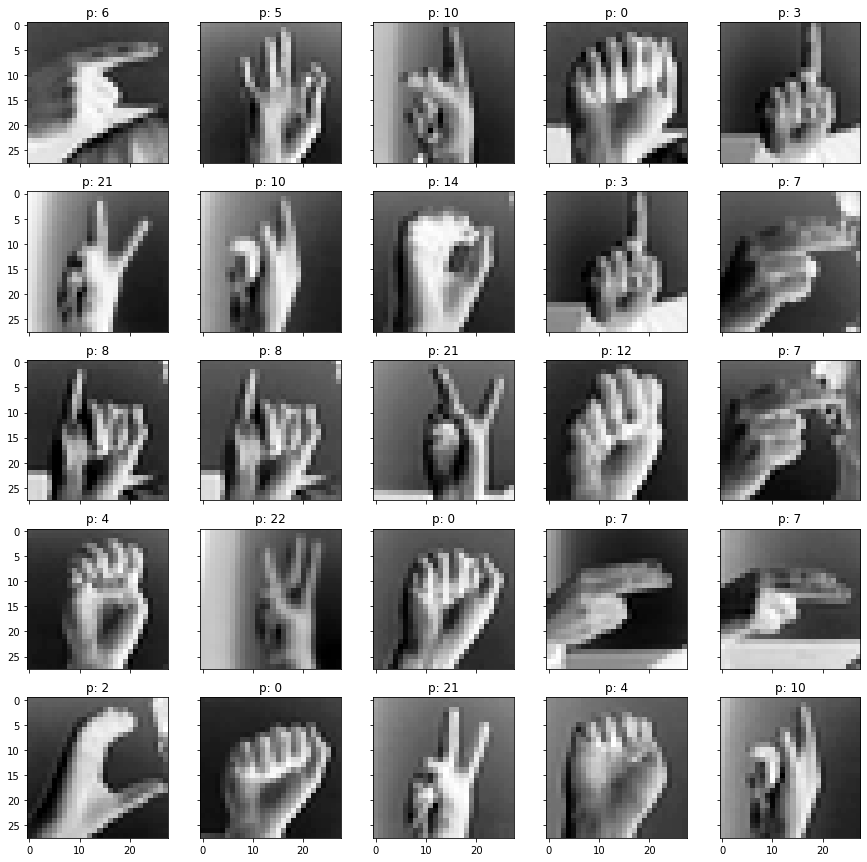

In [16]:
predict(model, X_test, 25)

In [17]:
test_Y = test_data['label'].copy()
check = test_Y[:25]
check

0      6
1      5
2     10
3      0
4      3
5     21
6     10
7     14
8      3
9      7
10     8
11     8
12    21
13    12
14     7
15     4
16    22
17     0
18     7
19     7
20     2
21     0
22    21
23     4
24    10
Name: label, dtype: int64

In [18]:
test_preds = model.predict(X_test)
test_preds = np.argmax(test_preds, axis = 1)
name = "Prajesh Sanghvi"
file_name = name + "_MNIST_sign_language.csv"
test_preds = pd.Series(test_preds, name = 'label')
submission = pd.concat([pd.Series(range(1,7173), name = "ImageID"), test_preds], axis = 1)
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
          'U', 'V', 'W', 'X', 'Y']
matching = []
test_match = np.asarray(test_preds)
for i in range(len(test_match)):
    if test_match[i] < 9:
        matching.append(letters[test_match[i]])
    else:
        matching.append(letters[test_match[i]-1])
match_series = pd.Series(matching, name = 'letters')
final_sub = pd.concat([submission, match_series], axis = 1)
final_sub.to_csv(file_name, index = False)